In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
house=pd.read_csv('/Users/bonnyma/Downloads/kc_house_data.csv')

In [3]:
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
house['year_combined'] = house.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] != 0 else row['yr_built'], axis=1)

In [107]:
from datetime import datetime
current_year = datetime.now().year
print(current_year)

2023


In [108]:
house['number_years']=  current_year- house['yr_built']

In [8]:
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_combined,number_years
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,1955,68
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1991,72
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,1933,90
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1965,58
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,1987,36
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2001,22
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,1995,28
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,1963,60
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,730,1960,0,98146,47.5123,-122.337,1780,8113,1960,63
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,2003,20


In [9]:
unique_count = house['zipcode'].nunique()

print(unique_count)

70


In [10]:
average_price = house.groupby('zipcode')['price'].mean().sort_values(ascending=False)
print(average_price)


zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
             ...     
98148    2.849086e+05
98001    2.808047e+05
98032    2.512962e+05
98168    2.403284e+05
98002    2.342840e+05
Name: price, Length: 70, dtype: float64


In [11]:
house['Value_Rank'] = house.groupby('zipcode')['price'].transform('mean').rank(ascending=False)
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_combined,number_years,Value_Rank
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,1955,68,18477.5
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,1991,72,11774.5
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,1933,90,12375.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,1965,58,9802.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,1987,36,3540.0
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,2001,0,98053,47.6561,-122.005,4760,101930,2001,22,4161.0
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,1995,28,19826.5
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,1963,60,19016.5
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,1960,0,98146,47.5123,-122.337,1780,8113,1960,63,16093.5
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,2003,20,15654.5


**Feature Engineer**
1. I combined two columns, 'yr_built' and 'yr_renovated', if the 'yr_renovated' is not zero, than assigned to the'year_combined' column, otherwise, assign the 'yr_built'to the 'year_combined' column. Second step is use current year minus the year_combined column to get the number of years that the house was built (number_years).
2. I try to use the zipcode to access their location and find the relationship for each zipcode and the house price, so I assign a numerical value to each zipcode based on their average house prices and rank them by a descending order, higer house price will get lower rank value.

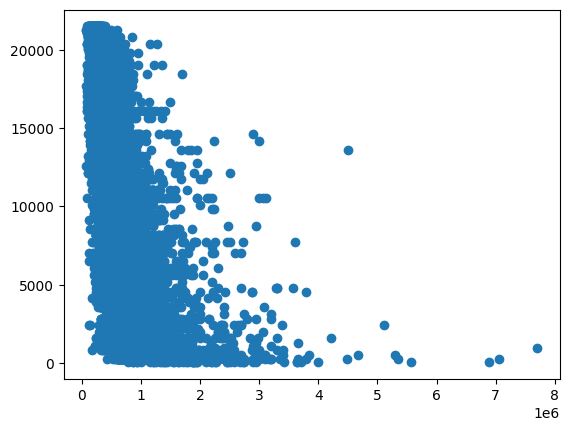

In [12]:
plt.scatter(house['price'],house['Value_Rank'])

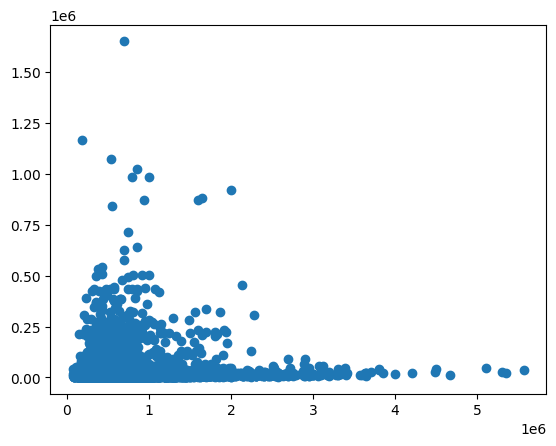

In [142]:
plt.scatter(house['price'],house['sqft_lot'])

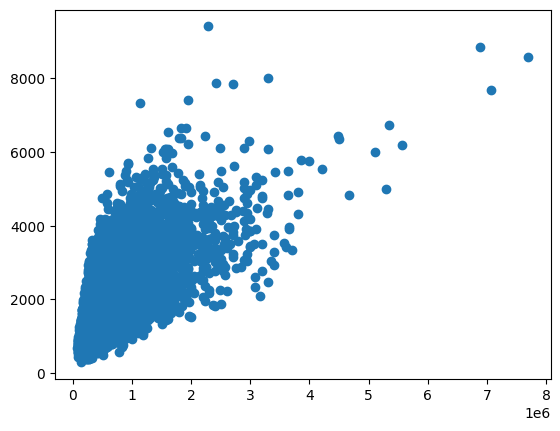

In [13]:
plt.scatter(house['price'],house['sqft_above'])

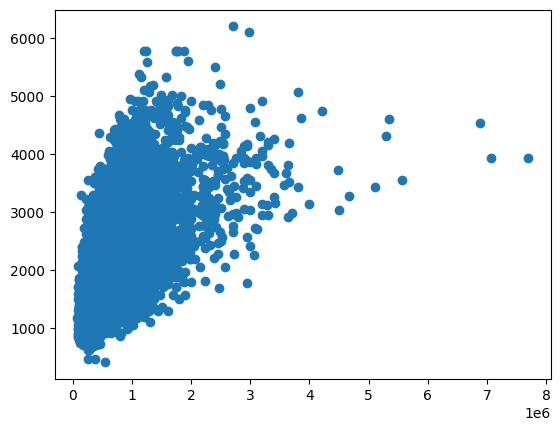

In [14]:
plt.scatter(house['price'],house['sqft_living15'])

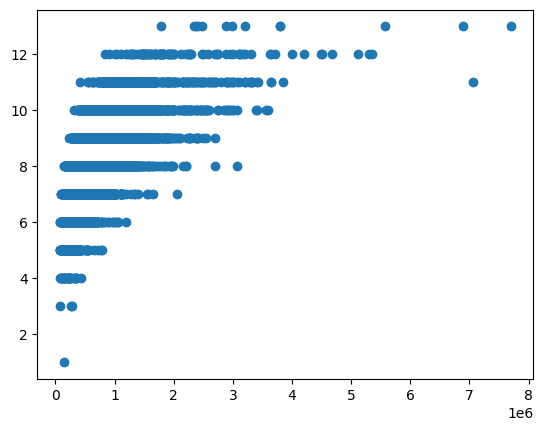

In [15]:
plt.scatter(house['price'],house['grade'])

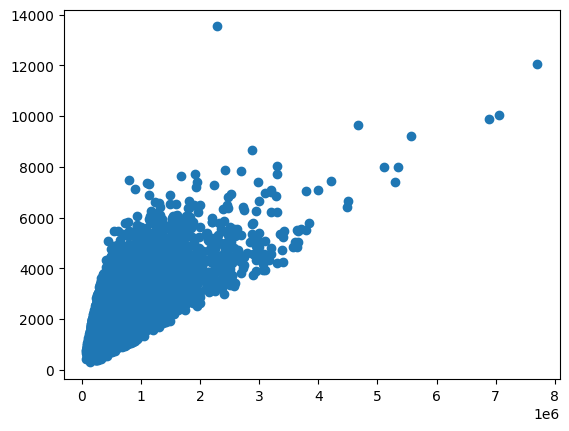

In [16]:
plt.scatter(house['price'],house['sqft_living'])

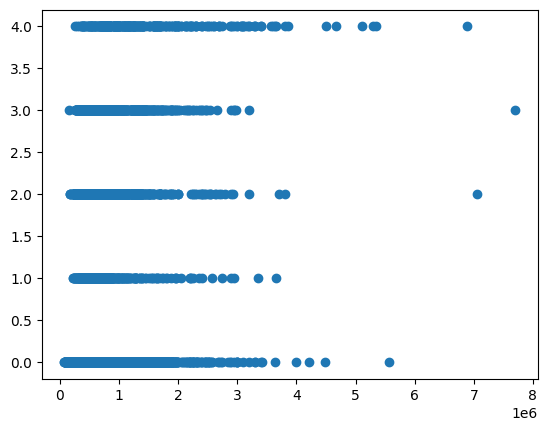

In [17]:
plt.scatter(house['price'],house['view'])

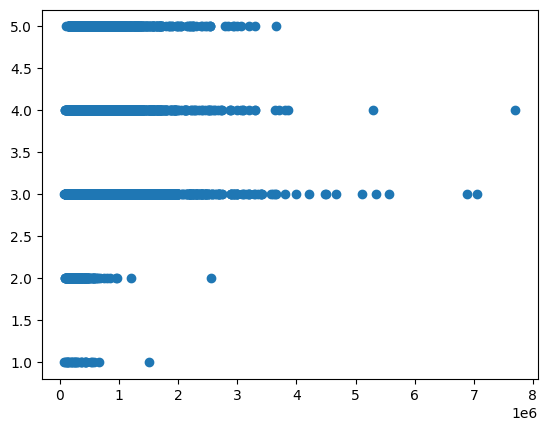

In [18]:
plt.scatter(house['price'], house['condition'])

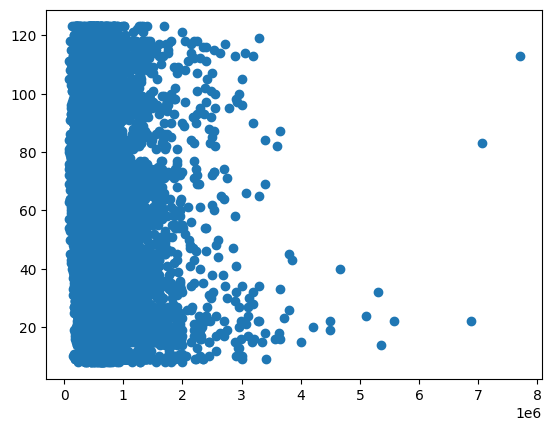

In [19]:
plt.scatter(house['price'], house['number_years'])

In [105]:
results = ols("price ~ grade + sqft_above  +view +bedrooms", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     6184.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:13:40   Log-Likelihood:            -2.9881e+05
No. Observations:               21610   AIC:                         5.976e+05
Df Residuals:                   21605   BIC:                         5.977e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.185e+05   1.42e+04    -50.605      0.0

In [144]:
results_1 = ols("price ~ grade  + sqft_living + Value_Rank + number_years +view", data=house).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                 1.147e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:45:47   Log-Likelihood:            -2.9305e+05
No. Observations:               21610   AIC:                         5.861e+05
Df Residuals:                   21604   BIC:                         5.862e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.267e+05   1.46e+04    -22.335   

**Choosing Independent Variables**
By having the scatter plot of each variable, we can see that 'sqft_above', 'sqft_living',and 'sqft_living15' are moving together, so I will choose one to include inthe regression model tp prevent from overfiting. I will use 'sqft_living' , 'Value_Rank', 'number_years','grade',and 'view' to predict the house price, it will explain 72.6% of the data. The adjust r-squared is the same, means that all 6 variables is meaningful and not overfitted.

In [111]:
pred_vals = results_1.predict(house[['sqft_living' , 'Value_Rank', 'number_years','grade','view']])
pred_vals

0        202264.292828
1        564927.708315
2        222443.517827
3        479716.770186
4        598955.672935
             ...      
21608    437016.922269
21609    391490.837649
21610    283596.391062
21611    481765.321341
21612    285624.510284
Length: 21610, dtype: float64

In [112]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house['price']], axis=1)

In [113]:
res['error'] = res['y_hat'] - res['price']

(array([3.0000e+00, 3.0000e+00, 8.0000e+00, 2.5000e+01, 5.6000e+01,
        1.6100e+02, 1.7650e+03, 1.9143e+04, 4.4100e+02, 5.0000e+00]),
 array([-3328243.24723588, -2874101.71417493, -2419960.18111399,
        -1965818.64805305, -1511677.11499211, -1057535.58193116,
         -603394.04887022,  -149252.51580928,   304889.01725166,
          759030.5503126 ,  1213172.08337355]),
 <BarContainer object of 10 artists>)

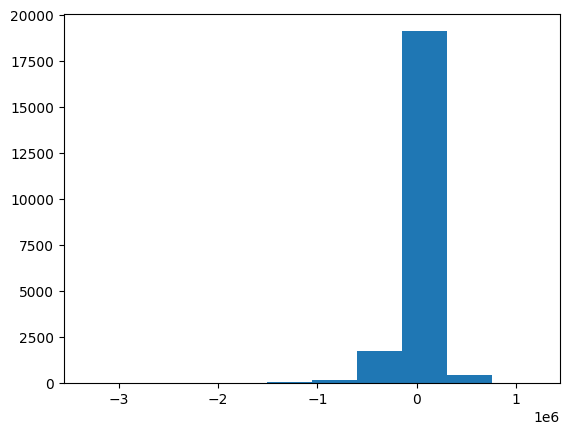

In [114]:
plt.hist(res['error'])

((array([-3.99700271, -3.78177781, -3.66404772, ...,  3.66404772,
          3.78177781,  3.99700271]),
  array([-3328243.24723588, -3089528.97984334, -3073549.02426461, ...,
           851584.00811873,  1023056.33072403,  1213172.08337355])),
 (163192.24324794314, 1.8835457096612783e-08, 0.8698289329525768))

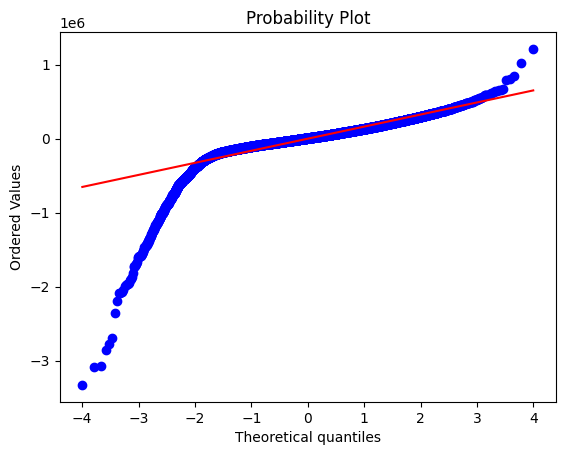

In [115]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [29]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_grade  dfb_sqft_above  dfb_sqft_living15   
0           0.000641  -0.000682        0.000266           0.000536  \
1          -0.000131   0.000176       -0.000330           0.000149   
2          -0.002967   0.007033        0.007142          -0.015262   
3           0.002931   0.001071       -0.002930          -0.003715   
4          -0.002863  -0.000779        0.000917           0.002892   
...              ...        ...             ...                ...   
21608      -0.001756  -0.001657        0.001434           0.003248   
21609      -0.000075   0.000008       -0.000138           0.000164   
21610       0.006631  -0.000760       -0.001346          -0.005565   
21611      -0.001963  -0.001743        0.000443           0.004584   
21612       0.002693  -0.000294       -0.000546          -0.002294   

       dfb_Value_Rank  dfb_number_years       cooks_d  standard_resid   
0           -0.001285         -0.000625  6.765447e-07       -0.160020  \
1            

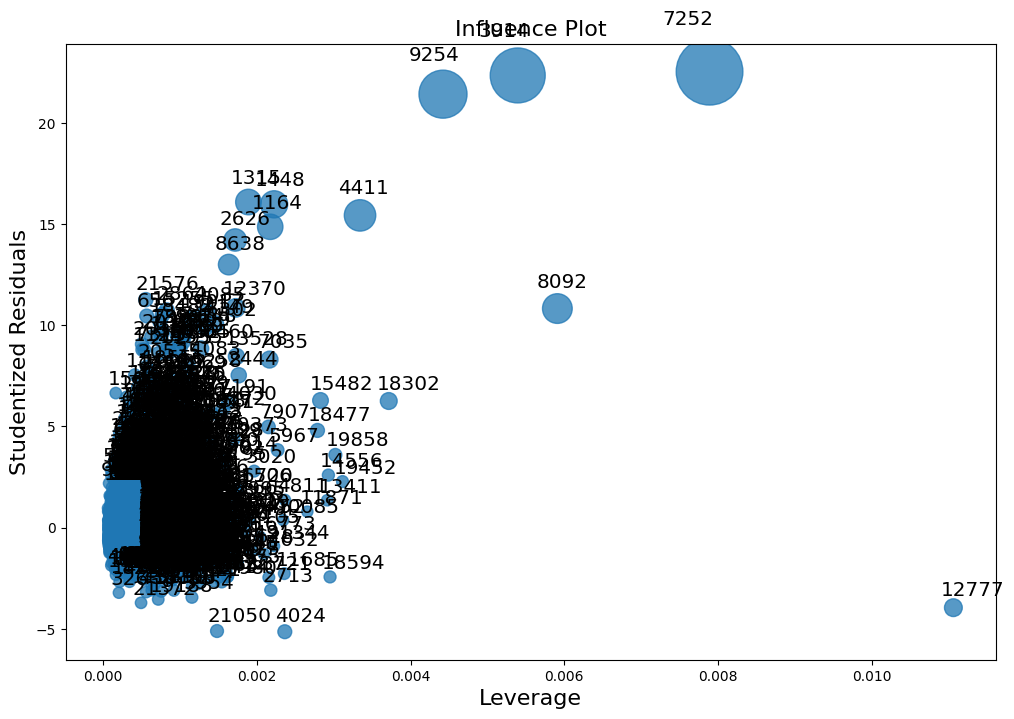

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [30]:
house.drop(index=[7252, 9254, 3914], inplace=True)

**The Influence Plot**

The influence plot helps assess the impact of individual data points on the overall fit of the model and be used to access the outlier. Therefore, the data points 7252, 9254, 3914 has larger impact of the entire dataset because it is far from the majority of the data and the magnitude of the circle is big, so I classify these three datapoints as outlier, and I decide to drop the outlier.

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer

In [117]:
categorical_features = ['grade','Value_Rank','view']
numerical_features = ['sqft_living','number_years']
target = 'price'

In [118]:
X_train, X_test, y_train, y_test = train_test_split(house[categorical_features + numerical_features]
                                                    ,house[target],
                                                    test_size = 0.3, random_state=1234)

In [119]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('imputer', SimpleImputer())])

In [120]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [121]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

In [122]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'Value_Rank',
                                                   'view']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['sqft_living',
                                                   'number_years'])])),
                ('regressor', LinearRegression())])

In [123]:
pred = linear_regression.predict(X_test)
pred

array([ 530885.98794531,  703494.02026995,  155474.75378868, ...,
        557985.61706296,  742752.08882509, 1294577.76402106])

In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
np.sqrt(mean_squared_error(pred,y_test))

145390.51009620517

In [126]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [127]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'Value_Rank',
                                                   'view']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['sqft_living',
                                                   'number_years'])])),
                ('regressor', Ridge(alpha=3.0))])

In [128]:
pred_ridge = ridge_regression.predict(X_test)

In [129]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

173929.10022850212

In [131]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [132]:
lasso_regression.fit(X_train, y_train)

/Users/bonnyma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5214285824274.1875, tolerance: 198702742615.55655
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'Value_Rank',
                                                   'view']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['sqft_living',
                                                   'number_years'])])),
                ('regressor', Lasso())])

In [133]:
lasso_pred = lasso_regression.predict(X_test)

In [134]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

145296.828680069

In [136]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.9))
])

In [137]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'Value_Rank',
                                                   'view']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['sqft_living',
                                                   'number_years'])])),
                ('regressor', ElasticNet(l1_ratio=0.9))])

In [138]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [139]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

217966.59613722024

In [151]:
coefficients = lasso_regression.named_steps['regressor'].coef_

In [154]:
for feature, coef in zip(categorical_features, coefficients):
    print(f'{feature}: {coef}')

grade: -154579.503090889
Value_Rank: 1368.812320840838
view: -105858.27215346345


In [155]:
for feature, coef in zip(numerical_features, coefficients):
    print(f'{feature}: {coef}')

sqft_living: -154579.503090889
number_years: 1368.812320840838


**Best Model**

Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of regression models. It measures the average squared difference between the predicted values and the true values of the target variable. Accroding to the MSE, the LASSO regression has the lowest MSE, which performs better predictions of the house price. Lasso regression can perform automatic feature selection by shrinking some coefficients to zero. It effectively identifies and excludes irrelevant or less important features from the model. This can simplify the model, improve interpretability, and reduce overfitting by eliminating noise or irrelevant variables.



 **Explain the results to a business executive**
 Lasso regression is a form of linear regression that incorporates a penalty term based on the absolute values of the regression coefficients. This penalty encourages some coefficients to become zero, promoting sparsity in the coefficient values. By examining the coefficients of each independent variable, we observe that 'grade' and 'sqft_living' have the highest absolute coefficients, followed by 'Value_Rank' and 'number_years', while 'view' has the lowest coefficient. These coefficients indicate the influence of each variable on the predicted house price. A larger absolute coefficient suggests a stronger impact on the predicted house price.

In the OLS regression model, only 'Value_Rank' demonstrates a negative relationship with the house price. Since the ranking is ordered in descending order, a higher 'Value_Rank' corresponds to a lower house price. On the other hand, the remaining factors exhibit a positive relationship with the house price. However, the dataset exhibits strong multicollinearity, such as between 'sqft_living' and 'sqft_living15', which can affect the accuracy of predictions. To improve the prediction accuracy, it would be advisable to include additional data related to the house that are not highly correlated, such as market demand and economic factors.